# Final Project
- Note: Steps 1-5 are from the Midterm and 6-10 are the Final Project

Evan Tschosik "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

(Project based on and recreated in Python from R by Yuemin Zhang http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html)

Sources include the link above and the online discussion forum

## Import Packages and Data

In [1]:
#import python packages (these are the most popular ones)
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

from yellowbrick.features import FeatureImportances

In [2]:
df = pd.read_csv('movie_metadata.csv')
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

## 1. Background on the Project

### 1.1 Summary of the Project

Movies that involve big name actors and directors are often very profitable and seen as sucessful. These things dont always lead to a high IMDB score though.

The question we are trying to solve in this project is what contributes to giving a movie a high IMDB score.

### 1.2 Goals of the Project

1. To determine the factors and variables that predict a movie to have a high IMDB score.
2. To help film companies build successful movies with or without the big name actors and directors.
3. To provide simple and understandable explanations for the data manipulating, visualizations, and statistical testing done on the predictors of IMDB score.

### 1.3 Type of Data to Collect

Thankfully we already have most of the data we need, If is was doing this from scratch though I would collect the data from the movies with a score of 7.5 or greater. With that list of movies I would make sure that the IMDB score, Director, Actors, Box office history of director and actors, Genre, Budget of Film were all data that was collected on the movies.

### 1.4 Variables highly correlated to IMDB Score

In [3]:
df.corr()

num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.258486   
duration                                 0.258486  1.000000   
director_facebook_likes                  0.180674  0.173296   
actor_3_facebook_likes                   0.271646  0.123558   
actor_1_facebook_likes                   0.190016  0.088449   
gross                                    0.480601  0.250298   
num_voted_users                          0.624943  0.314765   
cast_total_facebook_likes                0.263203  0.123074   
facenumber_in_poster                    -0.033897  0.013469   
num_user_for_reviews                     0.609387  0.328403   
budget                                   0.119994  0.074276   
title_year                               0.275707 -0.135038   
actor_2_facebook_likes                   0.282306  0.131673   
imdb_score                               0.305303  0.261662   
aspect_ratio                            -0.049786 -0.090071   
movie_facebook_likes                     0.683176  0.196605   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.180674                0.271646   
duration                                  0.173296                0.123558   
director_facebook_likes                   1.000000                0.120199   
actor_3_facebook_likes                    0.120199                1.000000   
actor_1_facebook_likes                    0.090723                0.249927   
gross                                     0.144945                0.308026   
num_voted_users                           0.297057                0.287239   
cast_total_facebook_likes                 0.119549                0.473920   
facenumber_in_poster                     -0.041268                0.099368   
num_user_for_reviews                      0.221890                0.230189   
budget                                    0.021090                0.047451   
title_year                               -0.063820                0.096137   
actor_2_facebook_likes                    0.119601                0.559662   
imdb_score                                0.170802                0.052633   
aspect_ratio                              0.001642               -0.003366   
movie_facebook_likes                      0.162048                0.278844   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.190016  0.480601         0.624943   
duration                                 0.088449  0.250298         0.314765   
director_facebook_likes                  0.090723  0.144945         0.297057   
actor_3_facebook_likes                   0.249927  0.308026         0.287239   
actor_1_facebook_likes                   1.000000  0.154468         0.192804   
gross                                    0.154468  1.000000         0.637271   
num_voted_users                          0.192804  0.637271         1.000000   
cast_total_facebook_likes                0.951661  0.247400         0.265911   
facenumber_in_poster                     0.072257 -0.027755        -0.026998   
num_user_for_reviews                     0.145461  0.559958         0.798406   
budget                                   0.022639  0.102179         0.079621   
title_year                               0.086873  0.030886         0.007397   
actor_2_facebook_likes                   0.390487  0.262768         0.270790   
imdb_score                               0.076099  0.198021         0.410965   
aspect_ratio                            -0.020049  0.069346        -0.014761   
movie_facebook_likes                     0.135348  0.378082         0.537924   

                           cast_total_facebook_likes  facenumber_in_poster  \
num_critic_for_reviews                      0.263203             -0.033897   
duration                                    0.123074              0.013469   
director_facebook_likes          

Some correlations to notice from above involving the IMDB Score are:

1. Number of Critics
2. Duration
3. Number of users voted (highest)
4. Number of Users for Reviews
5. Director's page Facebook Likes (lowest)
6. Gross
7. Title Year
8. Movie page Facebook Likes

## 2. Data Understanding

### 2.1 Figuring out the data were using.

In [4]:
df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

We have a total of 28 columns in the data set:

- 16 of them are numerical columns
- 12 of them are strings or categorical columns

In [6]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
df.groupby('movie_title').size().sort_values(ascending = False)

movie_title
Halloween                                    3
King Kong                                    3
The Fast and the Furious                     3
Pan                                          3
Home                                         3
Ben-Hur                                      3
Victor Frankenstein                          3
Hamlet                                       2
Footloose                                    2
The Omen                                     2
Conan the Barbarian                          2
A Nightmare on Elm Street                    2
Jack Reacher                                 2
Unknown                                      2
Dredd                                        2
Dekalog                                      2
Spider-Man 3                                 2
Chasing Liberty                              2
Eddie the Eagle                              2
RoboCop                                      2
The Alamo                                    2
T

There is duplicates of several Titles that need to be removed,

In [8]:
df.groupby('content_rating').size().sort_values(ascending = False)

content_rating
R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
dtype: int64

Data Issues that can be seen:

- There are duplicate movies that have multiple rows within the dataset.
- There are a ton of null values within the dataset. Only 7 columns do not have any null values.
- The content rating variable has some different ratings that are not applicable to today

### 2.2 Looking into the columns that could be used to predict IMDB Score

In [9]:
df['director_name'].value_counts()

Steven Spielberg        26
Woody Allen             22
Martin Scorsese         20
Clint Eastwood          20
Ridley Scott            17
Steven Soderbergh       16
Tim Burton              16
Spike Lee               16
Renny Harlin            15
Oliver Stone            14
Barry Levinson          13
Robert Zemeckis         13
John Carpenter          13
Robert Rodriguez        13
Joel Schumacher         13
Sam Raimi               13
Ron Howard              13
Michael Bay             13
Tony Scott              12
Brian De Palma          12
Kevin Smith             12
Shawn Levy              12
Wes Craven              12
Peter Jackson           12
Richard Donner          12
Stephen Frears          11
Rob Cohen               11
Rob Reiner              11
Francis Ford Coppola    11
Richard Linklater       11
                        ..
Sam Fell                 1
Norman Ferguson          1
Tim Hunter               1
Robert Butler            1
Ted Demme                1
Jerry Belson             1
G

In [10]:
df['title_year'].value_counts().head(10)

2009.0    260
2014.0    252
2006.0    239
2013.0    237
2010.0    230
2015.0    226
2011.0    225
2008.0    225
2012.0    221
2005.0    221
Name: title_year, dtype: int64

There appears to be that most of the top moives come from this century and not from previous ones.

In [11]:
df['duration'].value_counts().head(10)

90.0     161
100.0    141
101.0    139
98.0     135
97.0     131
93.0     129
94.0     124
99.0     124
95.0     124
96.0     113
Name: duration, dtype: int64

The majority of movies apear to have a duration inbetween 90 and 100 minutes.

In [12]:
df['director_facebook_likes'].value_counts().head(10)

0.0     907
3.0      70
6.0      66
7.0      64
2.0      63
4.0      60
11.0     59
10.0     53
8.0      52
5.0      52
Name: director_facebook_likes, dtype: int64

The majority of the directors do not have many facebook likes at all.

In [13]:
df['num_user_for_reviews'].value_counts().head(10)

1.0     51
3.0     33
2.0     32
26.0    32
10.0    29
6.0     28
50.0    26
8.0     25
32.0    25
11.0    24
Name: num_user_for_reviews, dtype: int64

This category has a wide range as there is several movies that only have 1, 2, or 3 reviews and it calls into question how accurate are those reviews.

In [14]:
df['num_critic_for_reviews'].value_counts().head(10)

1.0     43
9.0     37
5.0     36
10.0    35
8.0     35
12.0    34
16.0    33
81.0    33
43.0    31
29.0    30
Name: num_critic_for_reviews, dtype: int64

This category has the same issue as the one above as there is several movies that have a low number of people who reveiwed them so that calls into question are those reviews a good representation of the film.

In [15]:
df['aspect_ratio'].value_counts().head(10)

2.35     2360
1.85     1906
1.78      110
1.37      100
1.33       68
1.66       64
16.00      45
2.20       15
2.39       15
4.00        7
Name: aspect_ratio, dtype: int64

The majority of the movies have the same aspect ratio so we can determine that the aspect ratio wont have a very big effect on the movies score.

### 2.3 Summary/ Explanation of the Data

This data has a total of 28 different variables:

- 12 Categorical
- 16 Numerical

Some data issues are involved with some missing values to some duplicate rows within the dataset

The data is presented well with most of the categories not having major issues with the exception of the number of people who are reviewing the movies as that could call into qustion the validity of the review.

## 3. Data Transformation

### 3.1 Remove Duplicates

In [16]:
df = df.drop_duplicates(subset = 'movie_title')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 5042
Data columns (total 28 columns):
color                        4898 non-null object
director_name                4815 non-null object
num_critic_for_reviews       4868 non-null float64
duration                     4902 non-null float64
director_facebook_likes      4815 non-null float64
actor_3_facebook_likes       4894 non-null float64
actor_2_name                 4904 non-null object
actor_1_facebook_likes       4910 non-null float64
gross                        4054 non-null float64
genres                       4917 non-null object
actor_1_name                 4910 non-null object
movie_title                  4917 non-null object
num_voted_users              4917 non-null int64
cast_total_facebook_likes    4917 non-null int64
actor_3_name                 4894 non-null object
facenumber_in_poster         4904 non-null float64
plot_keywords                4765 non-null object
movie_imdb_link              4917 non-

After removing the duplicates, we have around 4917 observations left out of the original 5043

In [18]:
df.groupby('movie_title').size().sort_values(ascending = False)

movie_title
Æon Flux                                      1
Head of State                                 1
Hatchet                                       1
Hav Plenty                                    1
Hayride                                       1
Haywire                                       1
He Got Game                                   1
He's Just Not That Into You                   1
Head Over Heels                               1
Headhunters                                   1
Hardball                                      1
Heartbeeps                                    1
Heartbreakers                                 1
Hearts in Atlantis                            1
Heaven Is for Real                            1
Heaven's Gate                                 1
Heavenly Creatures                            1
Heavy Metal                                   1
Harvard Man                                   1
Hart's War                                    1
Harsh Times                 

### 3.2 Dealing with Columns that are not needed

In [19]:
df = df.drop('aspect_ratio', axis = 1)
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

                                     movie_imdb_link num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...               3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...               1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...               2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                  NaN   

   language  country content_rating       budget title_year  \
0   English      USA          PG-13  237000000.0     2009.0   
1   English      USA          PG-13  300000000.0     2007.0   
2   English       UK          PG-13  245000000.0     2015.0   
3   English      USA          PG-13  250000000.0     2012.0   
4       NaN      NaN            NaN          NaN        NaN   

  actor_2_facebook_likes  imdb_score movie_facebook_likes  
0                  936.0         7.9                33000  
1                 5000.0         7.1                    0  
2                  393.0         6.8                85000  
3                23000.0         8.5               164000  
4                   12.0         7.1                    0  

[5 rows x 27 columns]

I  dropped the aspect ratio since most of the movies have the same aspect ratio that woould not have a large impact of the IMDB score.

In [20]:
df['color'].value_counts()

Color               4694
 Black and White     204
Name: color, dtype: int64

In [21]:
df = df.drop('color', axis = 1)
df.head()

director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name  ...                                    movie_imdb_link  \
0      CCH Pounder  ...  http://www.imdb.com/title/tt0499549/?ref_=fn_t...   
1      Johnny Depp  ...  http://www.imdb.com/title/tt0449088/?ref_=fn_t...   
2  Christoph Waltz  ...  http://www.imdb.com/title/tt2379713/?ref_=fn_t...   
3        Tom Hardy  ...  http://www.imdb.com/title/tt1345836/?ref_=fn_t...   
4      Doug Walker  ...  http://www.imdb.com/title/tt5289954/?ref_=fn_t...   

   num_user_for_reviews  language country  content_rating       budget  \
0                3054.0   English     USA           PG-13  237000000.0   
1                1238.0   English     USA           PG-13  300000000.0   
2                 994.0   English      UK           PG-13  245000000.0   
3                2701.0   English     USA           PG-13  250000000.0   
4                   NaN       NaN     NaN             NaN          NaN   

  title_year  actor_2_facebook_likes imdb_score movie_facebook_likes  
0     2009.0                   936.0        7.9                33000  
1     2007.0                  5000.0        7.1                    0  
2     2015.0                   393.0        6.8                85000  
3     2012.0                 23000.0        8.5               164000  
4        NaN                    12.0        7.1                    0  

[5 rows x 26 columns]

Since a large majority of the films are in color that would most likely not impact the IMDB score.

In [22]:
df['language'].value_counts()

English       4583
French          73
Spanish         40
Hindi           28
Mandarin        24
German          19
Japanese        17
Italian         11
Russian         11
Cantonese       11
Portuguese       8
Korean           7
Swedish          5
Danish           5
Arabic           5
Hebrew           5
Norwegian        4
Dutch            4
Persian          4
Thai             3
Polish           3
Chinese          3
None             2
Icelandic        2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Dzongkha         1
Tamil            1
Czech            1
Kazakh           1
Swahili          1
Aramaic          1
Bosnian          1
Slovenian        1
Greek            1
Filipino         1
Telugu           1
Maya             1
Urdu             1
Panjabi          1
Hungarian        1
Vietnamese       1
Mongolian        1
Kannada          1
Name: language, dtype: int64

In [23]:
df = df.drop('language', axis = 1)

Since most movies are shown in English as the main language that colomn would not be a major predictor of the IMDB score.

### 3.3 Removing Null Values and Replacing Zeros

In [24]:
df.isnull().sum()

director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

Since there are so many null values the best thing would be to remove null vales that are important to predicting the IMDB score.

Rows that also are missing the content rating will be removed as we have no way of replacing that information accuretly.

In [25]:
df = df[np.isfinite(df['budget'])] #Keeps rows where budget is a finite number.
df.isnull().sum()

director_name                  8
num_critic_for_reviews        31
duration                       5
director_facebook_likes        8
actor_3_facebook_likes        16
actor_2_name                  10
actor_1_facebook_likes         6
gross                        644
genres                         0
actor_1_name                   6
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  16
facenumber_in_poster          11
plot_keywords                112
movie_imdb_link                0
num_user_for_reviews          11
country                        1
content_rating               205
budget                         0
title_year                     8
actor_2_facebook_likes        10
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [26]:
df = df[np.isfinite(df['gross'])] 
df.isnull().sum()

director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
movie_facebook_likes          0
dtype: int64

In [27]:
df = df.dropna(subset = ['content_rating'])
df.isnull().sum()

director_name                 0
num_critic_for_reviews        1
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        6
actor_2_name                  2
actor_1_facebook_likes        1
gross                         0
genres                        0
actor_1_name                  1
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  6
facenumber_in_poster          6
plot_keywords                21
movie_imdb_link               0
num_user_for_reviews          0
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        2
imdb_score                    0
movie_facebook_likes          0
dtype: int64

In [28]:
df = df.fillna({'facenumber_in_poster' : df['facenumber_in_poster'].mean()})

df = df.replace({'num_critic_for_reviews': 0}, {'num_critic_for_reviews': np.nan})
df = df.fillna({'num_critic_for_reviews' : df['num_critic_for_reviews'].mean()})

df = df.replace({'director_facebook_likes': 0}, {'director_facebook_likes': np.nan})
df = df.fillna({'director_facebook_likes' : df['director_facebook_likes'].mean()})

df = df.replace({'actor_3_facebook_likes': 0}, {'actor_3_facebook_likes': np.nan})
df = df.fillna({'actor_3_facebook_likes' : df['actor_3_facebook_likes'].mean()})

df = df.replace({'actor_1_facebook_likes': 0}, {'actor_1_facebook_likes': np.nan})
df = df.fillna({'actor_1_facebook_likes' : df['actor_1_facebook_likes'].mean()})

df = df.replace({'cast_total_facebook_likes': 0}, {'cast_total_facebook_likes': np.nan})
df = df.fillna({'cast_total_facebook_likes' : df['cast_total_facebook_likes'].mean()})

df = df.replace({'actor_2_facebook_likes': 0}, {'actor_2_facebook_likes': np.nan})
df = df.fillna({'actor_2_facebook_likes' : df['actor_2_facebook_likes'].mean()})

df = df.replace({'movie_facebook_likes': 0}, {'movie_facebook_likes': np.nan})
df = df.fillna({'movie_facebook_likes' : df['movie_facebook_likes'].mean()})

df.head(10)

director_name  num_critic_for_reviews  duration  \
0       James Cameron                   723.0     178.0   
1      Gore Verbinski                   302.0     169.0   
2          Sam Mendes                   602.0     148.0   
3   Christopher Nolan                   813.0     164.0   
5      Andrew Stanton                   462.0     132.0   
6           Sam Raimi                   392.0     156.0   
7        Nathan Greno                   324.0     100.0   
8         Joss Whedon                   635.0     141.0   
9         David Yates                   375.0     153.0   
10        Zack Snyder                   673.0     183.0   

    director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0                    961.75                   855.0   Joel David Moore   
1                    563.00                  1000.0      Orlando Bloom   
2                    961.75                   161.0       Rory Kinnear   
3                  22000.00                 23000.0     Christian Bale   
5                    475.00                   530.0    Samantha Morton   
6                    961.75                  4000.0       James Franco   
7                     15.00                   284.0       Donna Murphy   
8                    961.75                 19000.0  Robert Downey Jr.   
9                    282.00                 10000.0   Daniel Radcliffe   
10                   961.75                  2000.0       Lauren Cohan   

    actor_1_facebook_likes        gross  \
0                   1000.0  760505847.0   
1                  40000.0  309404152.0   
2                  11000.0  200074175.0   
3                  27000.0  448130642.0   
5                    640.0   73058679.0   
6                  24000.0  336530303.0   
7                    799.0  200807262.0   
8                  26000.0  458991599.0   
9                  25000.0  301956980.0   
10                 15000.0  330249062.0   

                                               genres     actor_1_name  ...  \
0                     Action|Adventure|Fantasy|Sci-Fi      CCH Pounder  ...   
1                            Action|Adventure|Fantasy      Johnny Depp  ...   
2                           Action|Adventure|Thriller  Christoph Waltz  ...   
3                                     Action|Thriller        Tom Hardy  ...   
5                             Action|Adventure|Sci-Fi     Daryl Sabara  ...   
6                            Action|Adventure|Romance     J.K. Simmons  ...   
7   Adventure|Animation|Comedy|Family|Fantasy|Musi...     Brad Garrett  ...   
8                             Action|Adventure|Sci-Fi  Chris Hemsworth  ...   
9                    Adventure|Family|Fantasy|Mystery     Alan Rickman  ...   
10                            Action|Adventure|Sci-Fi     Henry Cavill  ...   

                                        plot_keywords  \
0              avatar|future|marine|native|paraplegic   
1   goddess|marriage ceremony|marriage proposal|pi...   
2                 bomb|espionage|sequel|spy|terrorist   
3   deception|imprisonment|lawlessness|police offi...   
5   alien|american civil war|male nipple|mars|prin...   
6           sandman|spider man|symbiote|venom|villain   
7   17th century|based on fairy tale|disney|flower...   
8   artificial intelligence|based on comic book|ca...   
9                    blood|book|love|potion|professor   
10  based on comic book|batman|sequel to a reboot|...   

                                      movie_imdb_link  num_user_for_reviews  \
0   http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1   http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2   http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3   http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
5   http://www.imdb.com/title/tt0401729/?ref_=fn_t...                 738.0   
6   http://www.imdb.com/title/tt0413300/?ref_=fn_t...                1902.0   
7   http://www.imd

I replaced all of the colomns will null values with the mean of that column.

### 3.4 Creating a dataset that separates the genres to help analyze late

In [29]:
genres = pd.DataFrame(df.genres.str.split('|').tolist(), index=df.imdb_score).stack()
genres = genres.reset_index()[[0, 'imdb_score']] # genres variable is currently labeled 0
genres.columns = ['genres', 'imdb_score'] # renaming genres
genres.head()

genres  imdb_score
0     Action         7.9
1  Adventure         7.9
2    Fantasy         7.9
3     Sci-Fi         7.9
4     Action         7.1

### 3.5 Creating a profit column to analyze

In [30]:
df['profit'] = df['gross'] - df['budget']
df.head(10)

director_name  num_critic_for_reviews  duration  \
0       James Cameron                   723.0     178.0   
1      Gore Verbinski                   302.0     169.0   
2          Sam Mendes                   602.0     148.0   
3   Christopher Nolan                   813.0     164.0   
5      Andrew Stanton                   462.0     132.0   
6           Sam Raimi                   392.0     156.0   
7        Nathan Greno                   324.0     100.0   
8         Joss Whedon                   635.0     141.0   
9         David Yates                   375.0     153.0   
10        Zack Snyder                   673.0     183.0   

    director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0                    961.75                   855.0   Joel David Moore   
1                    563.00                  1000.0      Orlando Bloom   
2                    961.75                   161.0       Rory Kinnear   
3                  22000.00                 23000.0     Christian Bale   
5                    475.00                   530.0    Samantha Morton   
6                    961.75                  4000.0       James Franco   
7                     15.00                   284.0       Donna Murphy   
8                    961.75                 19000.0  Robert Downey Jr.   
9                    282.00                 10000.0   Daniel Radcliffe   
10                   961.75                  2000.0       Lauren Cohan   

    actor_1_facebook_likes        gross  \
0                   1000.0  760505847.0   
1                  40000.0  309404152.0   
2                  11000.0  200074175.0   
3                  27000.0  448130642.0   
5                    640.0   73058679.0   
6                  24000.0  336530303.0   
7                    799.0  200807262.0   
8                  26000.0  458991599.0   
9                  25000.0  301956980.0   
10                 15000.0  330249062.0   

                                               genres     actor_1_name  ...  \
0                     Action|Adventure|Fantasy|Sci-Fi      CCH Pounder  ...   
1                            Action|Adventure|Fantasy      Johnny Depp  ...   
2                           Action|Adventure|Thriller  Christoph Waltz  ...   
3                                     Action|Thriller        Tom Hardy  ...   
5                             Action|Adventure|Sci-Fi     Daryl Sabara  ...   
6                            Action|Adventure|Romance     J.K. Simmons  ...   
7   Adventure|Animation|Comedy|Family|Fantasy|Musi...     Brad Garrett  ...   
8                             Action|Adventure|Sci-Fi  Chris Hemsworth  ...   
9                    Adventure|Family|Fantasy|Mystery     Alan Rickman  ...   
10                            Action|Adventure|Sci-Fi     Henry Cavill  ...   

                                      movie_imdb_link  num_user_for_reviews  \
0   http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1   http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2   http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3   http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
5   http://www.imdb.com/title/tt0401729/?ref_=fn_t...                 738.0   
6   http://www.imdb.com/title/tt0413300/?ref_=fn_t...                1902.0   
7   http://www.imdb.com/title/tt0398286/?ref_=fn_t...                 387.0   
8   http://www.imdb.com/title/tt2395427/?ref_=fn_t...                1117.0   
9   http://www.imdb.com/title/tt0417741/?ref_=fn_t...                 973.0   
10  http://www.imdb.com/title/tt2975590/?ref_=fn_t...                3018.0   

    country content_rating       budget title_year actor_2_facebook_likes  \
0       USA          PG-13  237000000.0     2009.0                  936.0   
1       USA          PG-13  300000000.0     2007.0                 5000.0   
2        UK          PG-13  245000000.0     2015.0                  393.0   
3       USA          

We made a profit column to compare how well a movie did in the box office compared to its budget.

### 3.6 Replacing content ratings from the past with today's rankings

In [31]:
df = df.replace({'content_rating': 'Approved'}, {'content_rating': 'R'})
df = df.replace({'content_rating': 'Not Rated'}, {'content_rating': 'R'})
df = df.replace({'content_rating': 'Passed'}, {'content_rating': 'R'})
df = df.replace({'content_rating': 'Unrated'}, {'content_rating': 'R'})

df = df.replace({'content_rating': 'M'}, {'content_rating': 'PG'})
df = df.replace({'content_rating': 'GP'}, {'content_rating': 'PG'})
df = df.replace({'content_rating': 'X'}, {'content_rating': 'NC-17'})

df['content_rating'].value_counts()


R        1785
PG-13    1283
PG        564
G          91
NC-17      15
Name: content_rating, dtype: int64

This makes the ratings more unifrom as the past ratings are outdate and no longer used on modern movies.

### 3.7 Regrouping countries other than the US and the UK to their own countries

In [32]:
df['country'].value_counts()

USA               2971
UK                 309
France             103
Germany             77
Canada              63
Australia           38
Spain               22
Japan               15
China               13
Hong Kong           13
Italy               11
Mexico              10
Denmark              9
New Zealand          9
South Korea          7
Ireland              7
Brazil               5
India                5
Norway               4
Iran                 4
Thailand             4
Czech Republic       3
Russia               3
Netherlands          3
South Africa         3
Argentina            3
Hungary              2
Taiwan               2
Romania              2
Israel               2
Philippines          1
Chile                1
West Germany         1
Indonesia            1
Belgium              1
Aruba                1
Poland               1
Peru                 1
Finland              1
New Line             1
Iceland              1
Official site        1
Colombia             1
Greece     

In [33]:
filt = (df['country'] != 'USA') & (df['country'] != 'UK')
df['country'] = np.where(filt, 'Other', df['country'])
df['country'].value_counts()

USA      2971
Other     458
UK        309
Name: country, dtype: int64

We did this that way it would be easier to perform a correlation annalysis later beacuse haveing several diffrent 1 contires would have made it difficult to determine which contry was ideal.

## 4. Data Visualization

### 4.1 Movies by Year

In [34]:
px.histogram(df, x="title_year", labels = {'title_year': "Years"}, title="Number of Movies per Year", color = 'content_rating')

As showm most movies come after 1985 so we will only work with movies that come after that year.

In [35]:
df = df.loc[df['title_year'] >= 1985]
df.head(10)

director_name  num_critic_for_reviews  duration  \
0       James Cameron                   723.0     178.0   
1      Gore Verbinski                   302.0     169.0   
2          Sam Mendes                   602.0     148.0   
3   Christopher Nolan                   813.0     164.0   
5      Andrew Stanton                   462.0     132.0   
6           Sam Raimi                   392.0     156.0   
7        Nathan Greno                   324.0     100.0   
8         Joss Whedon                   635.0     141.0   
9         David Yates                   375.0     153.0   
10        Zack Snyder                   673.0     183.0   

    director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0                    961.75                   855.0   Joel David Moore   
1                    563.00                  1000.0      Orlando Bloom   
2                    961.75                   161.0       Rory Kinnear   
3                  22000.00                 23000.0     Christian Bale   
5                    475.00                   530.0    Samantha Morton   
6                    961.75                  4000.0       James Franco   
7                     15.00                   284.0       Donna Murphy   
8                    961.75                 19000.0  Robert Downey Jr.   
9                    282.00                 10000.0   Daniel Radcliffe   
10                   961.75                  2000.0       Lauren Cohan   

    actor_1_facebook_likes        gross  \
0                   1000.0  760505847.0   
1                  40000.0  309404152.0   
2                  11000.0  200074175.0   
3                  27000.0  448130642.0   
5                    640.0   73058679.0   
6                  24000.0  336530303.0   
7                    799.0  200807262.0   
8                  26000.0  458991599.0   
9                  25000.0  301956980.0   
10                 15000.0  330249062.0   

                                               genres     actor_1_name  ...  \
0                     Action|Adventure|Fantasy|Sci-Fi      CCH Pounder  ...   
1                            Action|Adventure|Fantasy      Johnny Depp  ...   
2                           Action|Adventure|Thriller  Christoph Waltz  ...   
3                                     Action|Thriller        Tom Hardy  ...   
5                             Action|Adventure|Sci-Fi     Daryl Sabara  ...   
6                            Action|Adventure|Romance     J.K. Simmons  ...   
7   Adventure|Animation|Comedy|Family|Fantasy|Musi...     Brad Garrett  ...   
8                             Action|Adventure|Sci-Fi  Chris Hemsworth  ...   
9                    Adventure|Family|Fantasy|Mystery     Alan Rickman  ...   
10                            Action|Adventure|Sci-Fi     Henry Cavill  ...   

                                      movie_imdb_link  num_user_for_reviews  \
0   http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1   http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2   http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3   http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
5   http://www.imdb.com/title/tt0401729/?ref_=fn_t...                 738.0   
6   http://www.imdb.com/title/tt0413300/?ref_=fn_t...                1902.0   
7   http://www.imdb.com/title/tt0398286/?ref_=fn_t...                 387.0   
8   http://www.imdb.com/title/tt2395427/?ref_=fn_t...                1117.0   
9   http://www.imdb.com/title/tt0417741/?ref_=fn_t...                 973.0   
10  http://www.imdb.com/title/tt2975590/?ref_=fn_t...                3018.0   

    country content_rating       budget title_year actor_2_facebook_likes  \
0       USA          PG-13  237000000.0     2009.0                  936.0   
1       USA          PG-13  300000000.0     2007.0                 5000.0   
2        UK          PG-13  245000000.0     2015.0                  393.0   
3       USA          

### 4.2 Top Movies Based on Profit

In [36]:
df1 = df.sort_values('profit',ascending = False).head(20)

px.scatter(df1, x="budget", y="profit", trendline='ols', hover_name = 'movie_title', title = 'Top 20 Profitable Movies')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



From the trend line we can see that most moives are more profitable when the budget that they have is higher.

### 4.3 Top 20 Directors in terms of IMDB Score

Text(0, 0.5, 'Director')

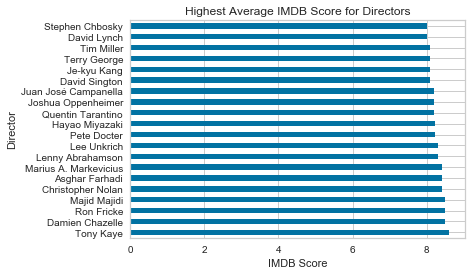

In [37]:
df.groupby('director_name')['imdb_score'].mean().sort_values(ascending = False).head(20).plot(kind = 'barh')

plt.title('Highest Average IMDB Score for Directors')
plt.xlabel('IMDB Score')
plt.ylabel('Director')

In [38]:
df.groupby('director_name')['imdb_score'].mean().sort_values(ascending = False).head(20)

director_name
Tony Kaye                8.600000
Damien Chazelle          8.500000
Ron Fricke               8.500000
Majid Majidi             8.500000
Christopher Nolan        8.425000
Asghar Farhadi           8.400000
Marius A. Markevicius    8.400000
Lenny Abrahamson         8.300000
Lee Unkrich              8.300000
Pete Docter              8.233333
Hayao Miyazaki           8.225000
Quentin Tarantino        8.200000
Joshua Oppenheimer       8.200000
Juan José Campanella     8.200000
David Sington            8.100000
Je-kyu Kang              8.100000
Terry George             8.100000
Tim Miller               8.100000
David Lynch              8.000000
Stephen Chbosky          8.000000
Name: imdb_score, dtype: float64

These are the directors with the highest IMDB score for their movies. Tony Kaye and Damien Chazelle are the 2 directors with the highest average score.

### 4.4 Highest Grossing Movies vs IMDB Scores

In [39]:
px.scatter(df1, x="imdb_score", y="gross", hover_name = 'movie_title', title = 'Highest Grossing Movies vs IMDB Score', color = 'content_rating', size = 'profit')

The size of the graph is determinesd by profitability and the diffrent collors correlat to diffrent ratings. When determining the sucess based on earnings it is diffuclt to determine how high an IMDB score the movie will get.

### 4.5 IMDB Score vs Movie Facebook Likes

In [40]:
px.scatter(df, x="movie_facebook_likes", y="imdb_score", hover_name = 'movie_title', title = 'IMDB Score vs Movie Facebook Likes', color = 'content_rating')

Movies with more facebook likes tend to have a higher rating but those with lower ammount of likes the rating varies from movie to movie.

### 4.6 Genre and the Average IMDB Score associated with each

In [41]:
avg_genre = genres.groupby('genres')['imdb_score'].mean().reset_index()
avg_genre

genres  imdb_score
0        Action    6.282688
1     Adventure    6.450460
2     Animation    6.702551
3     Biography    7.140833
4        Comedy    6.178397
5         Crime    6.544699
6   Documentary    6.998182
7         Drama    6.784701
8        Family    6.202283
9       Fantasy    6.284553
10    Film-Noir    7.700000
11      History    7.124503
12       Horror    5.897333
13        Music    6.360510
14      Musical    6.579381
15      Mystery    6.467021
16      Romance    6.425350
17       Sci-Fi    6.326611
18        Sport    6.600000
19     Thriller    6.371230
20          War    7.031613
21      Western    6.756667

In [42]:
px.bar(avg_genre, x="imdb_score", y="genres", orientation='h',
             title='IMDB Score by Genre')

The movie genre with the highes IMDB score is Film-Noir and the lowwest sccore is Horror.

### 4.7 Duration vs IMDB Score

In [43]:
df2 = df.sort_values('imdb_score', ascending = False).head(50)

px.scatter(df2, x="imdb_score", y="duration", hover_name='movie_title', color = 'content_rating', title = 'Duration vs IMDB Score', trendline = 'ols')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



To see if duration effected the IMDB score the rating of each movie is appleied to a trendline to the top 50 movies with the highest IMDB score.

- PG-13 and PG movies that are longer have better IMDB scores.
- G movies movies IMDB score decresed generally the longer the movies was.

In [44]:
px.scatter(df, x="imdb_score", y="duration", hover_name='movie_title', title = 'Duration vs IMDB Score', trendline = 'ols')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



The trend for every movie though is that the longer the movie the higher the IMDB score.

### 4.8 Comparing the top 20 movies to the rest of the movies in terms of IMDB Score

In [45]:
df1 = df
#rearrange the dataframe using sort by descending
toptobottom = df1.sort_values('imdb_score', ascending=-False)
# get top 20
top20 = toptobottom.head(20)
# get the rest
therest = toptobottom.iloc[20:]
# check the number of rows
print( len(toptobottom), len(top20), len(therest) )

3568 20 3548


In [46]:
df_comparison = top20.mean() / therest.mean()
df_comparison = df_comparison.reset_index()
df_comparison = df_comparison.rename(columns = {0:'Mean', 'index': 'Column'})
df_comparison.head()

Column       Mean
0   num_critic_for_reviews   1.793613
1                 duration   1.371493
2  director_facebook_likes  10.227323
3   actor_3_facebook_likes   3.964801
4   actor_1_facebook_likes   1.693113

In [47]:
px.bar(df_comparison, x='Mean', y="Column", orientation='h',
             title='Column Means of the Top 20 Movies Compared to The Rest')

What this graph shows us:
- The average profit for the Top 20 movies shows that those movies are much more profitavle on average than the rest of the movies.
- The average of directors facebook likes were about 11 times greater than those of the rest of the movie.
- The number of users voited was about 12 times greater than the rest of the movies.
- The number of users for review were also much higher for the top 20 movies than those of the rest of the movies.

## 5. Correlation Analysis

### 5.1 Setting up the dataset for correlation analysis

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 0 to 5042
Data columns (total 26 columns):
director_name                3568 non-null object
num_critic_for_reviews       3568 non-null float64
duration                     3568 non-null float64
director_facebook_likes      3568 non-null float64
actor_3_facebook_likes       3568 non-null float64
actor_2_name                 3566 non-null object
actor_1_facebook_likes       3568 non-null float64
gross                        3568 non-null float64
genres                       3568 non-null object
actor_1_name                 3567 non-null object
movie_title                  3568 non-null object
num_voted_users              3568 non-null int64
cast_total_facebook_likes    3568 non-null float64
actor_3_name                 3564 non-null object
facenumber_in_poster         3568 non-null float64
plot_keywords                3547 non-null object
movie_imdb_link              3568 non-null object
num_user_for_reviews         3568 no

Since we are tying to predict the IMDB score and there are so many names in a variety of columns it would be virtually impossible to use these to distinguish corelation so they will all be dropped.

- Actor Names
- Director Names
- Plot Keywords
- Movie IMDB Link
- Movie Title

In [49]:
df = df.drop(['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name','movie_imdb_link', 'movie_title', 'plot_keywords'] , axis = 1)
df.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                   961.75   
1                   302.0     169.0                   563.00   
2                   602.0     148.0                   961.75   
3                   813.0     164.0                 22000.00   
5                   462.0     132.0                   475.00   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
5                   530.0                   640.0   73058679.0   

                            genres  num_voted_users  \
0  Action|Adventure|Fantasy|Sci-Fi           886204   
1         Action|Adventure|Fantasy           471220   
2        Action|Adventure|Thriller           275868   
3                  Action|Thriller          1144337   
5          Action|Adventure|Sci-Fi           212204   

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0                     4834.0                   0.0                3054.0   
1                    48350.0                   0.0                1238.0   
2                    11700.0                   1.0                 994.0   
3                   106759.0                   0.0                2701.0   
5                     1873.0                   1.0                 738.0   

  country content_rating       budget  title_year  actor_2_facebook_likes  \
0     USA          PG-13  237000000.0      2009.0                   936.0   
1     USA          PG-13  300000000.0      2007.0                  5000.0   
2      UK          PG-13  245000000.0      2015.0                   393.0   
3     USA          PG-13  250000000.0      2012.0                 23000.0   
5     USA          PG-13  263700000.0      2012.0                   632.0   

   imdb_score  movie_facebook_likes       profit  
0         7.9          33000.000000  523505847.0  
1         7.1          16787.517928    9404152.0  
2         6.8          85000.000000  -44925825.0  
3         8.5         164000.000000  198130642.0  
5         6.6          24000.000000 -190641321.0

### 5.2 Setting up the categorical variables for correlation analysis

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 0 to 5042
Data columns (total 19 columns):
num_critic_for_reviews       3568 non-null float64
duration                     3568 non-null float64
director_facebook_likes      3568 non-null float64
actor_3_facebook_likes       3568 non-null float64
actor_1_facebook_likes       3568 non-null float64
gross                        3568 non-null float64
genres                       3568 non-null object
num_voted_users              3568 non-null int64
cast_total_facebook_likes    3568 non-null float64
facenumber_in_poster         3568 non-null float64
num_user_for_reviews         3568 non-null float64
country                      3568 non-null object
content_rating               3568 non-null object
budget                       3568 non-null float64
title_year                   3568 non-null float64
actor_2_facebook_likes       3568 non-null float64
imdb_score                   3568 non-null float64
movie_facebook_likes         35

In [51]:
df.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                   961.75   
1                   302.0     169.0                   563.00   
2                   602.0     148.0                   961.75   
3                   813.0     164.0                 22000.00   
5                   462.0     132.0                   475.00   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
5                   530.0                   640.0   73058679.0   

                            genres  num_voted_users  \
0  Action|Adventure|Fantasy|Sci-Fi           886204   
1         Action|Adventure|Fantasy           471220   
2        Action|Adventure|Thriller           275868   
3                  Action|Thriller          1144337   
5          Action|Adventure|Sci-Fi           212204   

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0                     4834.0                   0.0                3054.0   
1                    48350.0                   0.0                1238.0   
2                    11700.0                   1.0                 994.0   
3                   106759.0                   0.0                2701.0   
5                     1873.0                   1.0                 738.0   

  country content_rating       budget  title_year  actor_2_facebook_likes  \
0     USA          PG-13  237000000.0      2009.0                   936.0   
1     USA          PG-13  300000000.0      2007.0                  5000.0   
2      UK          PG-13  245000000.0      2015.0                   393.0   
3     USA          PG-13  250000000.0      2012.0                 23000.0   
5     USA          PG-13  263700000.0      2012.0                   632.0   

   imdb_score  movie_facebook_likes       profit  
0         7.9          33000.000000  523505847.0  
1         7.1          16787.517928    9404152.0  
2         6.8          85000.000000  -44925825.0  
3         8.5         164000.000000  198130642.0  
5         6.6          24000.000000 -190641321.0

In [52]:
genres.head()

genres  imdb_score
0     Action         7.9
1  Adventure         7.9
2    Fantasy         7.9
3     Sci-Fi         7.9
4     Action         7.1

For our genre dataset, we will be getting dummy variables based on the genres to help see if there's a correlaion between genre and IMDB score.

For our original dataset, we will be getting dummy variables based on content rating and country.

In [53]:
genres = pd.get_dummies(genres, columns = ['genres'])
genres.head()

imdb_score  genres_Action  genres_Adventure  genres_Animation  \
0         7.9              1                 0                 0   
1         7.9              0                 1                 0   
2         7.9              0                 0                 0   
3         7.9              0                 0                 0   
4         7.1              1                 0                 0   

   genres_Biography  genres_Comedy  genres_Crime  genres_Documentary  \
0                 0              0             0                   0   
1                 0              0             0                   0   
2                 0              0             0                   0   
3                 0              0             0                   0   
4                 0              0             0                   0   

   genres_Drama  genres_Family  ...  genres_Horror  genres_Music  \
0             0              0  ...              0             0   
1             0              0  ...              0             0   
2             0              0  ...              0             0   
3             0              0  ...              0             0   
4             0              0  ...              0             0   

   genres_Musical  genres_Mystery  genres_Romance  genres_Sci-Fi  \
0               0               0               0              0   
1               0               0               0              0   
2               0               0               0              0   
3               0               0               0              1   
4               0               0               0              0   

   genres_Sport  genres_Thriller  genres_War  genres_Western  
0             0                0           0               0  
1             0                0           0               0  
2             0                0           0               0  
3             0                0           0               0  
4             0                0           0               0  

[5 rows x 23 columns]

In [54]:
df = pd.get_dummies(df, columns = ['content_rating', 'country'])
df.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                   961.75   
1                   302.0     169.0                   563.00   
2                   602.0     148.0                   961.75   
3                   813.0     164.0                 22000.00   
5                   462.0     132.0                   475.00   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
5                   530.0                   640.0   73058679.0   

                            genres  num_voted_users  \
0  Action|Adventure|Fantasy|Sci-Fi           886204   
1         Action|Adventure|Fantasy           471220   
2        Action|Adventure|Thriller           275868   
3                  Action|Thriller          1144337   
5          Action|Adventure|Sci-Fi           212204   

   cast_total_facebook_likes  facenumber_in_poster  ...  movie_facebook_likes  \
0                     4834.0                   0.0  ...          33000.000000   
1                    48350.0                   0.0  ...          16787.517928   
2                    11700.0                   1.0  ...          85000.000000   
3                   106759.0                   0.0  ...         164000.000000   
5                     1873.0                   1.0  ...          24000.000000   

        profit  content_rating_G  content_rating_NC-17  content_rating_PG  \
0  523505847.0                 0                     0                  0   
1    9404152.0                 0                     0                  0   
2  -44925825.0                 0                     0                  0   
3  198130642.0                 0                     0                  0   
5 -190641321.0                 0                     0                  0   

   content_rating_PG-13  content_rating_R  country_Other  country_UK  \
0                     1                 0              0           0   
1                     1                 0              0           0   
2                     1                 0              0           1   
3                     1                 0              0           0   
5                     1                 0              0           0   

   country_USA  
0            1  
1            1  
2            0  
3            1  
5            1  

[5 rows x 25 columns]

The categorical variable needed to transformed into numerical variables that way they we could see if there was any correlation betweeen them and a high IMDB score.

### 5.3 Correlation Analysis

In [55]:
genres.corr()['imdb_score'][:].sort_values(ascending = False).head(10)

imdb_score            1.000000
genres_Drama          0.142554
genres_Biography      0.097472
genres_History        0.075165
genres_War            0.065587
genres_Documentary    0.036634
genres_Animation      0.031664
genres_Crime          0.022041
genres_Western        0.021230
genres_Sport          0.015934
Name: imdb_score, dtype: float64

In [56]:
genres.corr()['imdb_score'][:].sort_values(ascending = False).tail(12)

genres_Musical      0.011106
genres_Mystery      0.002011
genres_Adventure   -0.001387
genres_Romance     -0.008425
genres_Music       -0.010925
genres_Sci-Fi      -0.026317
genres_Thriller    -0.026589
genres_Fantasy     -0.035300
genres_Family      -0.049182
genres_Action      -0.050106
genres_Horror      -0.099953
genres_Comedy      -0.103816
Name: imdb_score, dtype: float64

In [57]:
df.corr()['imdb_score'][:].sort_values(ascending = False).head(10)

imdb_score                   1.000000
num_voted_users              0.473870
num_critic_for_reviews       0.366624
duration                     0.364027
num_user_for_reviews         0.322980
movie_facebook_likes         0.318983
gross                        0.212412
director_facebook_likes      0.212232
content_rating_R             0.165361
cast_total_facebook_likes    0.117655
Name: imdb_score, dtype: float64

In [58]:
df.corr()['imdb_score'][:].sort_values(ascending = False).tail(10)

actor_3_facebook_likes    0.078669
profit                    0.068094
budget                    0.061178
content_rating_G         -0.000731
content_rating_NC-17     -0.009745
title_year               -0.023803
facenumber_in_poster     -0.072994
content_rating_PG        -0.083191
content_rating_PG-13     -0.110759
country_USA              -0.138624
Name: imdb_score, dtype: float64

Variables with stong correlation to the IMDB score:

- Number of Critical Reviews
- Duration of the Film
- Amount of Facebook Likes on the Movie's page
- Number of Users for Reviews

Variables wil little to no correlation to the IMDB score:

- The year the movie came out
- Budget of the film
- Content Ratings: NC-17, G, PG
- Genres: Mystery, Musical, Adventure, Romance

### 5.4 Other Variable Correlations To Note

Text(0.5, 1, 'Correlation Analysis')

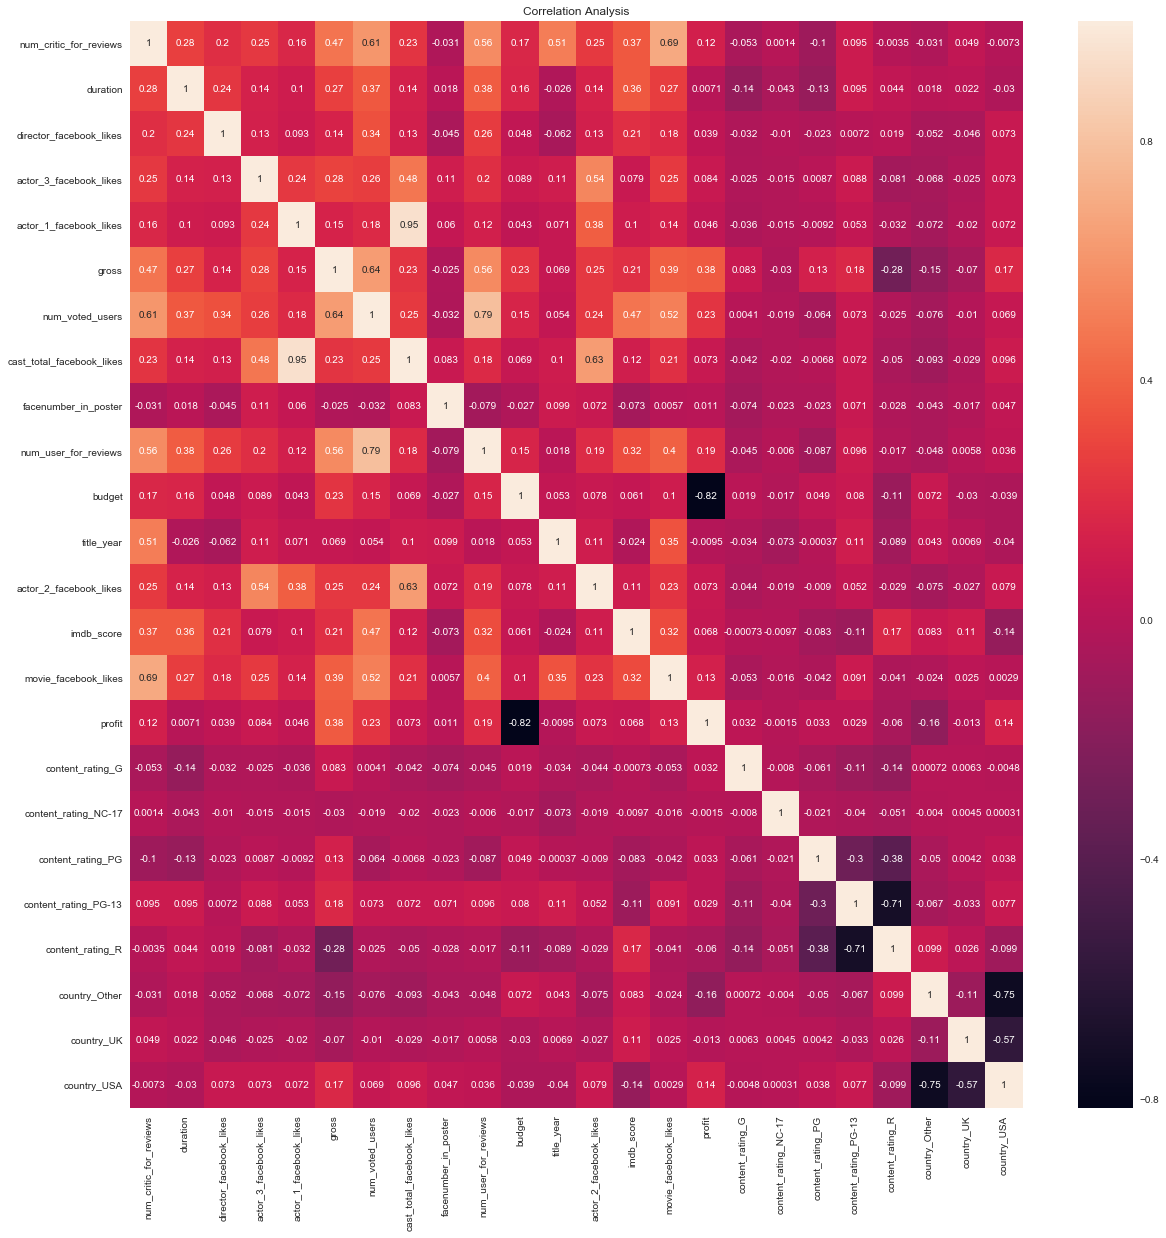

In [59]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Analysis')

Correlations to note:
- The reverse of these statments is also true.

For Duration of the Movie:
- As duration of a movie increases so does the:
    1. The number of users who reviewed the movie
    2. The number of critics who reviewed the film
    3. IMDB Score
    4. The number of users who voted for the movie

For the amount of gross:
- As the amount of gross increases, so does the:
    1. Number of users who reviewed the movie.
    2. Number of users who voted for the movie
    3. Number of critics who reviewed the movie
    4. Likes on the movie's facebook page

For the title year the movie was released:
- As the title year of the movie increases:
    1. The number of facebook likes a movie got on their page increased
    2. The number of critics who reviewed the movie increased

Characterisitics of Different Content Ratings:

- Content Rating of a Movie
    1. G
        - Nothing really significant to distinguish itself.
        - Positive gross and budget
    2. PG
        - High gross for these movies
    3. PG-13
        - High gross
        - Longer duration
        - High amount of users reviewed
    4. R
        - Low or decreasing gross
    5. NC-17
        - Only had one movie so not enough information.


##### This is the End of the Midterm part of the Project and everything after this is for the Final Project.

## 6. Regression Analysis 

 - In this section we will use a variety of regression model to determine which model would be best are predicting the ideal movie to create the best IMDB score.

### 6.1 Linear Regression Model

In [60]:
y = df['imdb_score'] 
X = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes', 'profit']]

Here I set the IMDB score as the Y value and then set the X values that'll be used in the regression model.

In [61]:
lr = lm.LinearRegression()
lr.fit(X, y)
y_lr = lr.predict (X)

In [62]:
print('Coefficients: ', lr.coef_)
print("y-intercept ", lr.intercept_)

Coefficients:  [ 2.30339248e-03  1.16188942e-02  5.29459845e-08  9.86597780e-05
  8.71854941e-05 -1.42756055e-09  3.59866876e-06 -8.61384692e-05
 -2.69319357e-02 -6.20010777e-04 -8.14287917e-10 -2.48236171e-02
  8.93414384e-05  1.41720325e-06 -6.14025763e-10]
y-intercept  54.55433102437266


In [63]:
pd.DataFrame(list(zip(X.columns, np.transpose(lr.coef_))))

0             1
0      num_critic_for_reviews  2.303392e-03
1                    duration  1.161889e-02
2     director_facebook_likes  5.294598e-08
3      actor_3_facebook_likes  9.865978e-05
4      actor_1_facebook_likes  8.718549e-05
5                       gross -1.427561e-09
6             num_voted_users  3.598669e-06
7   cast_total_facebook_likes -8.613847e-05
8        facenumber_in_poster -2.693194e-02
9        num_user_for_reviews -6.200108e-04
10                     budget -8.142879e-10
11                 title_year -2.482362e-02
12     actor_2_facebook_likes  8.934144e-05
13       movie_facebook_likes  1.417203e-06
14                     profit -6.140258e-10

This here is all the diffrent coeffecients for the catagories that the linear regression model predicted.

### 6.2 Statsmodel

In [64]:
lr_reg_model = ols("imdb_score~num_critic_for_reviews+duration+director_facebook_likes+actor_3_facebook_likes+actor_1_facebook_likes+gross+num_voted_users+cast_total_facebook_likes+facenumber_in_poster+num_user_for_reviews+budget+title_year+actor_2_facebook_likes+movie_facebook_likes+profit",df)
lr = lr_reg_model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          1.22e-308
Time:                        21:57:52   Log-Likelihood:                -4489.1
No. Observations:                3568   AIC:                             9008.
Df Residuals:                    3553   BIC:                             9101.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Which variables are significant? Which aren't?

By looking at the p-values and using a signifacance level of 5%, we can see that all the varialbes are significantly related the the imdb score except for the movies facebook likes and directors facebook likes.


### 6.3 Lasso model

In [65]:
model1 = lm.Lasso(alpha=0.1)             #higher alpha (penality parameter), fewer predictors
model1.fit(X, y)
model1_y = model1.predict(X)

print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7276851813771945
variance or r-squared:  0.33857973918925066


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1312.2406861296354, tolerance: 0.39254629484304987



In [66]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.011'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.003'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '0.000'),
 ('title_year', '-0.022'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '0.000'),
 ('profit', '0.000')]

Several X variables were removed from the model, including director facebook likes, actor 3 facebook likes, actor 1 facebook likes, gross, number of voted users, cast total facebook likes, number of users for revies, budget, actor 2 facebook likes, movie facebook likes, and profit. These removed cariavles have their coefficents close to 0

### 6.4 f_regression

In [67]:
X_new = SelectKBest(f_regression, k=5).fit_transform(X, y)
X_new

array([[7.23000000e+02, 1.78000000e+02, 8.86204000e+05, 3.05400000e+03,
        3.30000000e+04],
       [3.02000000e+02, 1.69000000e+02, 4.71220000e+05, 1.23800000e+03,
        1.67875179e+04],
       [6.02000000e+02, 1.48000000e+02, 2.75868000e+05, 9.94000000e+02,
        8.50000000e+04],
       ...,
       [5.60000000e+01, 8.10000000e+01, 5.20550000e+04, 1.30000000e+02,
        1.67875179e+04],
       [1.40000000e+01, 9.50000000e+01, 1.33800000e+03, 1.40000000e+01,
        4.13000000e+02],
       [4.30000000e+01, 9.00000000e+01, 4.28500000e+03, 8.40000000e+01,
        4.56000000e+02]])

In [68]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.7802578369125124
variance or r-squared:  0.2907944875095695


In [69]:
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 6]


In [70]:
X.head(2)

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                   961.75   
1                   302.0     169.0                   563.00   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                     4834.0                   0.0   
1           471220                    48350.0                   0.0   

   num_user_for_reviews       budget  title_year  actor_2_facebook_likes  \
0                3054.0  237000000.0      2009.0                   936.0   
1                1238.0  300000000.0      2007.0                  5000.0   

   movie_facebook_likes       profit  
0          33000.000000  523505847.0  
1          16787.517928    9404152.0

f_regression determines that number of critic for reviews and number of voted users are the two most important predictors. 

### 6.5 Recursive Feature Selection (RFE)

In [71]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print("Features sorted by their rank:")
print(sorted(zip([x for x in rfe.ranking_], X.columns)))

Features sorted by their rank:
[(1, 'duration'), (1, 'facenumber_in_poster'), (2, 'title_year'), (3, 'num_critic_for_reviews'), (4, 'actor_3_facebook_likes'), (5, 'actor_1_facebook_likes'), (6, 'actor_2_facebook_likes'), (7, 'cast_total_facebook_likes'), (8, 'director_facebook_likes'), (9, 'num_user_for_reviews'), (10, 'num_voted_users'), (11, 'movie_facebook_likes'), (12, 'gross'), (13, 'budget'), (14, 'profit')]


This form of a regression model shows which variables are very important in determining the IMDB score.

### 6.6 Regression model with fewwer predictors

In [72]:
#First Model
imdb_model1 = ols("imdb_score~duration+num_critic_for_reviews+num_user_for_reviews+num_voted_users",df)
imdb1 = imdb_model1.fit()
#Second Model
imdb_model2 = ols("imdb_score~num_voted_users+num_user_for_reviews",df)
imdb2 = imdb_model2.fit()
#Third Model
imdb_model3 = ols("imdb_score~num_user_for_reviews",df)
imdb3 = imdb_model3.fit()

In [73]:
print(imdb1.summary())
print(imdb2.summary())
print(imdb3.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     365.2
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          7.57e-264
Time:                        21:57:53   Log-Likelihood:                -4620.1
No. Observations:                3568   AIC:                             9250.
Df Residuals:                    3563   BIC:                             9281.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

- The first model has an Adjusted R-squared of 0.293, The second model has an Adjusted R-squared of 0.231, and the last model an Adjusted R-squared of 0.104.
- Based on the analysis we can confirm that the first model using duration, num_critic_for_reviews, num_user_for_reviews, num_voted_users, is the best model of the three for predicting the IMDB score.

### 6.7 Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.07161214545964131
variance or r-squared:  0.9349197916489927


Using the Random forest regressor we can use it to determine the feature importance.

In [75]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.017558084362270233, 'facenumber_in_poster'),
 (0.023224638740024738, 'actor_1_facebook_likes'),
 (0.026911353284251115, 'actor_2_facebook_likes'),
 (0.03071918522216305, 'actor_3_facebook_likes'),
 (0.03267301080333727, 'profit'),
 (0.035583692517247634, 'director_facebook_likes'),
 (0.03589477947290805, 'cast_total_facebook_likes'),
 (0.04070793252478162, 'title_year'),
 (0.04653161044073085, 'num_critic_for_reviews'),
 (0.06575439324864901, 'movie_facebook_likes'),
 (0.0682366838967717, 'num_user_for_reviews'),
 (0.06848215536348236, 'gross'),
 (0.09433834362947899, 'budget'),
 (0.11115994516973346, 'duration'),
 (0.3022241913241699, 'num_voted_users')]

In [76]:
feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

importance
num_voted_users              0.302224
duration                     0.111160
budget                       0.094338
gross                        0.068482
num_user_for_reviews         0.068237
movie_facebook_likes         0.065754
num_critic_for_reviews       0.046532
title_year                   0.040708
cast_total_facebook_likes    0.035895
director_facebook_likes      0.035584
profit                       0.032673
actor_3_facebook_likes       0.030719
actor_2_facebook_likes       0.026911
actor_1_facebook_likes       0.023225
facenumber_in_poster         0.017558

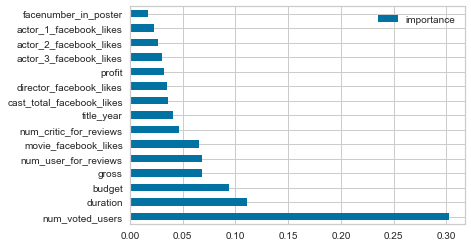

In [77]:
feature_importances.plot(kind='barh')

As you can see above the 5 features with the most importance are:
- Number of voted users with the highest importance at .30
- Duration of the movie with an importance of .11
- The budget of the movie with an importance of .094
- Gross of the movie with an importance of .068
- Number of users for review with a .068 importance rating.

## 7. Classification Analysis

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

# grid search
from sklearn.model_selection import GridSearchCV

# advanced algorthms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [79]:
df['imdb_label'] = pd.cut(df['imdb_score'], bins=[0, 4, 6, 8, float('Inf')], labels=['bad', 'OK', 'good', 'excellent'])

### 7.1 Classification model building

In [80]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 0 to 5042
Data columns (total 26 columns):
num_critic_for_reviews       3568 non-null float64
duration                     3568 non-null float64
director_facebook_likes      3568 non-null float64
actor_3_facebook_likes       3568 non-null float64
actor_1_facebook_likes       3568 non-null float64
gross                        3568 non-null float64
genres                       3568 non-null object
num_voted_users              3568 non-null int64
cast_total_facebook_likes    3568 non-null float64
facenumber_in_poster         3568 non-null float64
num_user_for_reviews         3568 non-null float64
budget                       3568 non-null float64
title_year                   3568 non-null float64
actor_2_facebook_likes       3568 non-null float64
imdb_score                   3568 non-null float64
movie_facebook_likes         3568 non-null float64
profit                       3568 non-null float64
content_rating_G             

In [81]:
y = df['imdb_label'] 
X = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes', 'profit']]

Above I set what the X and Y values would be for the classification model.

### 7.2 Decision Tree

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Above is the decision tree model evaluation spliting into train 70% and a test sets 30%.

In [83]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.6293183940242764
--------------------------------------------------------
[[148   9   0 136]
 [ 12   3   0  10]
 [  1   0  22  15]
 [177  17  20 501]]
--------------------------------------------------------
              precision    recall  f1-score   support

          OK       0.44      0.51      0.47       293
         bad       0.10      0.12      0.11        25
   excellent       0.52      0.58      0.55        38
        good       0.76      0.70      0.73       715

    accuracy                           0.63      1071
   macro avg       0.46      0.48      0.46      1071
weighted avg       0.65      0.63      0.64      1071

--------------------------------------------------------


ValueError: multiclass format is not supported

The decsion tree model is 63.9% accurate. Therefore, we expect that the model will be anout 64% accurate when apllied.

In [ ]:
!pip install pydotplus

In [84]:
from sklearn.externals.six import StringIO

# install pydotplus first (if not already done)
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("dt.pdf")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



True

In [85]:
from IPython.display import IFrame
IFrame('dt.pdf', width=1000, height=1000)

Interpretating the Decision Tree

- Movie facebook likes appears to be the single most influential factor.
- This descision tree does seem to be much to complicated to be practicale so we will try to simplify it.

### 7.3 Decision Tree simplification

In [86]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt_simple = dt_simple.fit(X_train, y_train)

dt_simple

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt_simple.predict(X_test)))

0.7236227824463118
--------------------------------------------------------
[[ 77   0   0 216]
 [ 10   0   0  15]
 [  0   0  21  17]
 [ 32   0   6 677]]
--------------------------------------------------------
              precision    recall  f1-score   support

          OK       0.65      0.26      0.37       293
         bad       0.00      0.00      0.00        25
   excellent       0.78      0.55      0.65        38
        good       0.73      0.95      0.83       715

    accuracy                           0.72      1071
   macro avg       0.54      0.44      0.46      1071
weighted avg       0.69      0.72      0.68      1071

--------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



ValueError: multiclass format is not supported

The simplified model has 72% acurracy which is much higher than the previous model.

### 7.4 Logistic Regression

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
print (metrics.accuracy_score(y_test, lr.predict(X_test)))
print (metrics.confusion_matrix(y_test, lr.predict(X_test)))
print (metrics.classification_report(y_test, lr.predict(X_test)))
print (metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.6862745098039216
[[ 22   0   0 271]
 [  0   0   0  25]
 [  0   0  13  25]
 [ 14   0   1 700]]
              precision    recall  f1-score   support

          OK       0.61      0.08      0.13       293
         bad       0.00      0.00      0.00        25
   excellent       0.93      0.34      0.50        38
        good       0.69      0.98      0.81       715

    accuracy                           0.69      1071
   macro avg       0.56      0.35      0.36      1071
weighted avg       0.66      0.69      0.59      1071



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



ValueError: multiclass format is not supported

The accuracey of the predicitons in this model is about 69%.

### 7.5 K-nearest Neighbors (knn)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Above we are evaluating the model by splitting into train and test sets & develop knn model

In [91]:
print (metrics.accuracy_score(y_test, knn.predict(X_test)))
print (metrics.confusion_matrix(y_test, knn.predict(X_test)))
print (metrics.classification_report(y_test, knn.predict(X_test)))
print (metrics.roc_auc_score(y_test, knn.predict(X_test)))

0.5975723622782446
[[ 89   0   0 204]
 [  7   0   0  18]
 [  4   0   1  33]
 [157   3   5 550]]
              precision    recall  f1-score   support

          OK       0.35      0.30      0.32       293
         bad       0.00      0.00      0.00        25
   excellent       0.17      0.03      0.05        38
        good       0.68      0.77      0.72       715

    accuracy                           0.60      1071
   macro avg       0.30      0.27      0.27      1071
weighted avg       0.56      0.60      0.57      1071



ValueError: multiclass format is not supported

Here is the model evaluatuion and it has about a 60% prediciton accuracy.

### 7.6 Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7264239028944911

In [93]:
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))
print(metrics.roc_auc_score(y_test, clf.predict(X_test)))

0.7264239028944911
[[141   1   0 151]
 [ 16   0   0   9]
 [  0   0  17  21]
 [ 92   0   3 620]]
              precision    recall  f1-score   support

          OK       0.57      0.48      0.52       293
         bad       0.00      0.00      0.00        25
   excellent       0.85      0.45      0.59        38
        good       0.77      0.87      0.82       715

    accuracy                           0.73      1071
   macro avg       0.55      0.45      0.48      1071
weighted avg       0.70      0.73      0.71      1071



ValueError: multiclass format is not supported

This model has a 73% accuracy when predicting the y value.

### 7.5 Feature Selection in Classification analysis

In [94]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

importance
num_voted_users              0.130867
duration                     0.089491
gross                        0.078516
budget                       0.077659
num_user_for_reviews         0.074143
movie_facebook_likes         0.070650
num_critic_for_reviews       0.068653
profit                       0.066508
director_facebook_likes      0.065790
actor_3_facebook_likes       0.056167
cast_total_facebook_likes    0.055166
actor_2_facebook_likes       0.049481
title_year                   0.047668
actor_1_facebook_likes       0.044813
facenumber_in_poster         0.024429

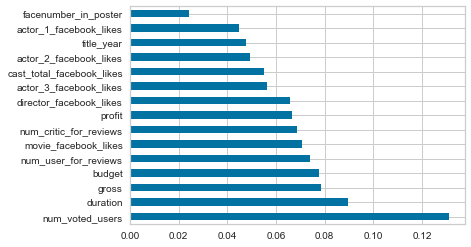

In [95]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

As shown above Number of users voted, duration, and gross are among the most important features when prdeicting the IMDB category.

In [96]:
X_new = SelectKBest(f_classif, k=5).fit_transform(X, y)
print(X_new)

[[7.23000000e+02 1.78000000e+02 8.86204000e+05 3.05400000e+03
  3.30000000e+04]
 [3.02000000e+02 1.69000000e+02 4.71220000e+05 1.23800000e+03
  1.67875179e+04]
 [6.02000000e+02 1.48000000e+02 2.75868000e+05 9.94000000e+02
  8.50000000e+04]
 ...
 [5.60000000e+01 8.10000000e+01 5.20550000e+04 1.30000000e+02
  1.67875179e+04]
 [1.40000000e+01 9.50000000e+01 1.33800000e+03 1.40000000e+01
  4.13000000e+02]
 [4.30000000e+01 9.00000000e+01 4.28500000e+03 8.40000000e+01
  4.56000000e+02]]


In [97]:
selector = SelectKBest(f_classif, k=5).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 0  1  6  9 13]


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 0 to 5042
Data columns (total 26 columns):
num_critic_for_reviews       3568 non-null float64
duration                     3568 non-null float64
director_facebook_likes      3568 non-null float64
actor_3_facebook_likes       3568 non-null float64
actor_1_facebook_likes       3568 non-null float64
gross                        3568 non-null float64
genres                       3568 non-null object
num_voted_users              3568 non-null int64
cast_total_facebook_likes    3568 non-null float64
facenumber_in_poster         3568 non-null float64
num_user_for_reviews         3568 non-null float64
budget                       3568 non-null float64
title_year                   3568 non-null float64
actor_2_facebook_likes       3568 non-null float64
imdb_score                   3568 non-null float64
movie_facebook_likes         3568 non-null float64
profit                       3568 non-null float64
content_rating_G             

Number of Critics for review, Duration, Gross, Cast total facebook likes, and Title year are selected as the five best predictors in the dataset.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print (metrics.accuracy_score(y_test, lr.predict(X_test)))
print (metrics.confusion_matrix(y_test, lr.predict(X_test)))
print (metrics.classification_report(y_test, lr.predict(X_test)))
print (metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.6825396825396826
[[  0   0   0 293]
 [  0   0   0  25]
 [  0   0  20  18]
 [  2   1   1 711]]
              precision    recall  f1-score   support

          OK       0.00      0.00      0.00       293
         bad       0.00      0.00      0.00        25
   excellent       0.95      0.53      0.68        38
        good       0.68      0.99      0.81       715

    accuracy                           0.68      1071
   macro avg       0.41      0.38      0.37      1071
weighted avg       0.49      0.68      0.56      1071



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



ValueError: multiclass format is not supported

Above I decided to develp a new logistic regression model based on the new predictors and this new model can predict with a 66% accuracy.

### 7.6 RFE

In [100]:
model = LogisticRegression()
rfe = RFE(model, 5)  #asking five best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Progra

[ True  True False False False False False False  True  True False  True
 False False False]
[ 1  1  6  3  4  9  8  5  1  1 10  1  2  7 11]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [101]:
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

feature  importance
0      num_critic_for_reviews           1
1                    duration           1
2     director_facebook_likes           6
3      actor_3_facebook_likes           3
4      actor_1_facebook_likes           4
5                       gross           9
6             num_voted_users           8
7   cast_total_facebook_likes           5
8        facenumber_in_poster           1
9        num_user_for_reviews           1
10                     budget          10
11                 title_year           1
12     actor_2_facebook_likes           2
13       movie_facebook_likes           7
14                     profit          11

Above I sorted the features by there rank that was derrived from the model.

In [102]:
X_logistic = df[['num_critic_for_reviews', 'duration', 'facenumber_in_poster', 'num_user_for_reviews', 'title_year']]
print(X_logistic.head())

   num_critic_for_reviews  duration  facenumber_in_poster  \
0                   723.0     178.0                   0.0   
1                   302.0     169.0                   0.0   
2                   602.0     148.0                   1.0   
3                   813.0     164.0                   0.0   
5                   462.0     132.0                   1.0   

   num_user_for_reviews  title_year  
0                3054.0      2009.0  
1                1238.0      2007.0  
2                 994.0      2015.0  
3                2701.0      2012.0  
5                 738.0      2012.0  


Above I selected the 5 most significant features only

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.6629318394024276
[[ 53   0   0 240]
 [  7   0   0  18]
 [  2   0   4  32]
 [ 54   0   8 653]]
              precision    recall  f1-score   support

          OK       0.46      0.18      0.26       293
         bad       0.00      0.00      0.00        25
   excellent       0.33      0.11      0.16        38
        good       0.69      0.91      0.79       715

    accuracy                           0.66      1071
   macro avg       0.37      0.30      0.30      1071
weighted avg       0.60      0.66      0.60      1071



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



ValueError: multiclass format is not supported

The above model can predict with around 66% accuracy.

## 8 Clustering Analysis

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

### 8.1 Perform a variance analysis

In [105]:
df.var()

num_critic_for_reviews       1.535214e+04
duration                     4.394523e+02
director_facebook_likes      9.031850e+06
actor_3_facebook_likes       3.493585e+06
actor_1_facebook_likes       2.494590e+08
gross                        4.723669e+15
num_voted_users              2.224624e+10
cast_total_facebook_likes    3.730724e+08
facenumber_in_poster         4.219041e+00
num_user_for_reviews         1.660521e+05
budget                       1.211247e+16
title_year                   4.964287e+01
actor_2_facebook_likes       2.070411e+07
imdb_score                   1.100494e+00
movie_facebook_likes         3.988886e+08
profit                       1.334355e+16
content_rating_G             2.165709e-02
content_rating_NC-17         2.795619e-03
content_rating_PG            1.203288e-01
content_rating_PG-13         2.300321e-01
content_rating_R             2.495288e-01
country_Other                1.094057e-01
country_UK                   7.139059e-02
country_USA                  1.614

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 0 to 5042
Data columns (total 26 columns):
num_critic_for_reviews       3568 non-null float64
duration                     3568 non-null float64
director_facebook_likes      3568 non-null float64
actor_3_facebook_likes       3568 non-null float64
actor_1_facebook_likes       3568 non-null float64
gross                        3568 non-null float64
genres                       3568 non-null object
num_voted_users              3568 non-null int64
cast_total_facebook_likes    3568 non-null float64
facenumber_in_poster         3568 non-null float64
num_user_for_reviews         3568 non-null float64
budget                       3568 non-null float64
title_year                   3568 non-null float64
actor_2_facebook_likes       3568 non-null float64
imdb_score                   3568 non-null float64
movie_facebook_likes         3568 non-null float64
profit                       3568 non-null float64
content_rating_G             

In [107]:
df = df.drop(['genres', 'imdb_label'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 0 to 5042
Data columns (total 24 columns):
num_critic_for_reviews       3568 non-null float64
duration                     3568 non-null float64
director_facebook_likes      3568 non-null float64
actor_3_facebook_likes       3568 non-null float64
actor_1_facebook_likes       3568 non-null float64
gross                        3568 non-null float64
num_voted_users              3568 non-null int64
cast_total_facebook_likes    3568 non-null float64
facenumber_in_poster         3568 non-null float64
num_user_for_reviews         3568 non-null float64
budget                       3568 non-null float64
title_year                   3568 non-null float64
actor_2_facebook_likes       3568 non-null float64
imdb_score                   3568 non-null float64
movie_facebook_likes         3568 non-null float64
profit                       3568 non-null float64
content_rating_G             3568 non-null uint8
content_rating_NC-17         3

We had to drop Geners and IMDB label as they were cateagorical variables and only numerical variables can be normalized.

In [108]:
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                0.687665  0.235326                 0.000968   
1                0.169192  0.204609                -0.016370   
2                0.538650  0.132936                 0.000968   
3                0.798502  0.187544                 0.915754   
5                0.366236  0.078329                -0.020197   

   actor_3_facebook_likes  actor_1_facebook_likes     gross  num_voted_users  \
0                0.003740               -0.010575  0.933568         0.464411   
1                0.010045                0.050363  0.340408         0.218821   
2               -0.026437                0.005050  0.196649         0.103211   
3                0.966650                0.030050  0.522822         0.617176   
5               -0.010392               -0.011137  0.029634         0.065534   

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  ...  \
0                  -0.010177             -0.032383              0.539460  ...   
1                   0.056084             -0.032383              0.180496  ...   
2                   0.000277             -0.009127              0.132265  ...   
3                   0.145024             -0.032383              0.469683  ...   
5                  -0.014686             -0.009127              0.081662  ...   

   movie_facebook_likes    profit  content_rating_G  content_rating_NC-17  \
0              0.046001  0.109278         -0.022141             -0.002803   
1             -0.000455  0.000434         -0.022141             -0.002803   
2              0.195002 -0.011069         -0.022141             -0.002803   
3              0.421371  0.040390         -0.022141             -0.002803   
5              0.020212 -0.041919         -0.022141             -0.002803   

   content_rating_PG  content_rating_PG-13  content_rating_R  country_Other  \
0          -0.139854              0.641536         -0.476738         -0.125   
1          -0.139854              0.641536         -0.476738         -0.125   
2          -0.139854              0.641536         -0.476738         -0.125   
3          -0.139854              0.641536         -0.476738         -0.125   
5          -0.139854              0.641536         -0.476738         -0.125   

   country_UK  country_USA  
0   -0.077354     0.202354  
1   -0.077354     0.202354  
2    0.922646    -0.797646  
3   -0.077354     0.202354  
5   -0.077354     0.202354  

[5 rows x 24 columns]

### 8.2 K-means clustering analysis

In [109]:
k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [110]:
k_means.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [111]:
k_means.cluster_centers_

array([[ 2.81488739e+02,  1.20060811e+02,  1.77262613e+03,
         1.79699550e+03,  1.17711374e+04,  1.94964743e+08,
         3.06555644e+05,  1.96053941e+04,  1.22383658e+00,
         7.80671171e+02,  9.63461149e+07,  2.00515315e+03,
         4.14521171e+03,  6.98153153e+00,  3.28292249e+04,
         9.86186282e+07,  4.72972973e-02, -1.77809156e-17,
         2.38738739e-01,  5.15765766e-01,  1.98198198e-01,
         4.95495495e-02,  4.27927928e-02,  9.07657658e-01],
       [ 1.17333333e+02,  1.23666667e+02,  2.04100000e+03,
         5.32235368e+02,  4.63333333e+02,  9.68155667e+05,
         8.02940000e+04,  1.23733333e+03,  3.33333333e-01,
         2.31333333e+02,  2.34250663e+09,  2.00200000e+03,
         3.96333333e+02,  7.46666667e+00,  4.19333333e+03,
        -2.34153848e+09, -3.46944695e-18,  0.00000000e+00,
         0.00000000e+00,  6.66666667e-01,  3.33333333e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.02000000e+02,  1.12000000e+02,  9.61750000e

Above I am making the cluster into 5 different groups.

In [112]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

cluster
0        0
1        0
2        0
3        0
4        3

In [113]:
df2 = df.join(df1)
df2.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                   961.75   
1                   302.0     169.0                   563.00   
2                   602.0     148.0                   961.75   
3                   813.0     164.0                 22000.00   
5                   462.0     132.0                   475.00   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
5                   530.0                   640.0   73058679.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                     4834.0                   0.0   
1           471220                    48350.0                   0.0   
2           275868                    11700.0                   1.0   
3          1144337                   106759.0                   0.0   
5           212204                     1873.0                   1.0   

   num_user_for_reviews  ...       profit  content_rating_G  \
0                3054.0  ...  523505847.0                 0   
1                1238.0  ...    9404152.0                 0   
2                 994.0  ...  -44925825.0                 0   
3                2701.0  ...  198130642.0                 0   
5                 738.0  ... -190641321.0                 0   

   content_rating_NC-17  content_rating_PG  content_rating_PG-13  \
0                     0                  0                     1   
1                     0                  0                     1   
2                     0                  0                     1   
3                     0                  0                     1   
5                     0                  0                     1   

   content_rating_R  country_Other  country_UK  country_USA  cluster  
0                 0              0           0            1      0.0  
1                 0              0           0            1      0.0  
2                 0              0           1            0      0.0  
3                 0              0           0            1      0.0  
5                 0              0           0            1      0.0  

[5 rows x 25 columns]

Here I have applied the cluster column to the rest of the data frame.

In [114]:
df2.groupby('cluster').size()

cluster
0.0     415
1.0       2
3.0    2521
4.0       6
dtype: int64

Cluster 1 has 415 observations
Cluster 2 has 2 observations
Clsuter 3 has 0 observations
Cluster 4 has 2,521 observations
Clsuter 5 has 6 observations

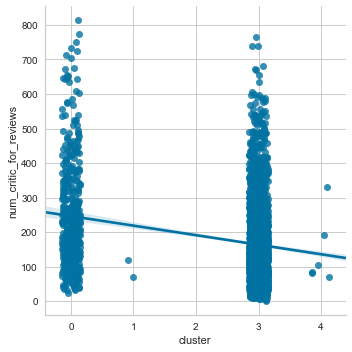

In [115]:
sns.lmplot("cluster", "num_critic_for_reviews", df2, x_jitter=.15, y_jitter=.15)

Here is a graph distribution of the different clusters.

In [116]:
df2.groupby(['cluster']).mean() 

num_critic_for_reviews    duration  director_facebook_likes  \
cluster                                                                
0.0                  246.761446  117.718072              1263.982530   
1.0                   93.500000  138.000000              8150.000000   
3.0                  163.470052  110.170567               992.650635   
4.0                  143.833333  104.333333               211.791667   

         actor_3_facebook_likes  actor_1_facebook_likes         gross  \
cluster                                                                 
0.0                 1443.481220            10484.098795  1.115849e+08   
1.0                   79.500000             8402.500000  4.354218e+07   
3.0                  770.548616             8232.741117  5.070202e+07   
4.0                  630.166667             4083.000000  3.632318e+07   

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0.0        190086.563855               16955.284337              1.268394   
1.0         36002.000000               14427.500000              1.000000   
3.0        101626.353035               12093.323323              1.470508   
4.0         73209.166667                7109.666667              1.500000   

         num_user_for_reviews  ...  movie_facebook_likes        profit  \
cluster                        ...                                       
0.0                595.725301  ...          26626.440436  1.148699e+07   
1.0                170.000000  ...           8777.258964  1.454218e+07   
3.0                314.815946  ...          16759.438961  9.409400e+06   
4.0                313.166667  ...          14691.678619  1.082318e+07   

         content_rating_G  content_rating_NC-17  content_rating_PG  \
cluster                                                              
0.0              0.026506              0.000000           0.216867   
1.0              0.000000              0.000000           0.000000   
3.0              0.025783              0.000793           0.145974   
4.0              0.000000              0.000000           0.500000   

         content_rating_PG-13  content_rating_R  country_Other  country_UK  \
cluster                                                                      
0.0                  0.518072          0.238554       0.067470    0.096386   
1.0                  1.000000          0.000000       0.000000    0.000000   
3.0                  0.376835          0.450615       0.120587    0.072194   
4.0                  0.333333          0.166667       0.000000    0.000000   

         country_USA  
cluster               
0.0         0.836145  
1.0         1.000000  
3.0         0.807219  
4.0         1.000000  

[4 rows x 24 columns]

Profile of each cluster:
- Cluster 1: High number of critic reviews, high number of users voted, high Gross, and high number of users for review 
- Cluster 2: Low number of critic reviews, low number of users voted, average Gross, and low number of users for review 
- Cluster 4: Averge number of critic reviews, average number of users voted, average Gross, and average number of users for review 
- Cluster 5: Average number of critic reviews, average number of users voted, low Gross, and average number of users for review 

### 8.3 Hierachical clustering Analysis

In [117]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

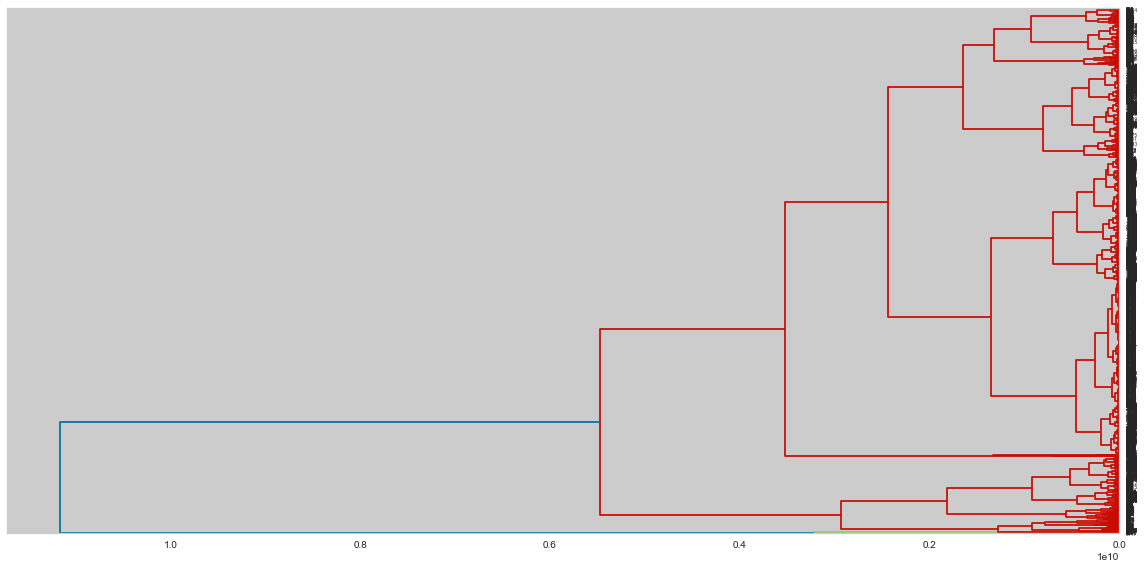

In [118]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

This is the clustering matrix left alined

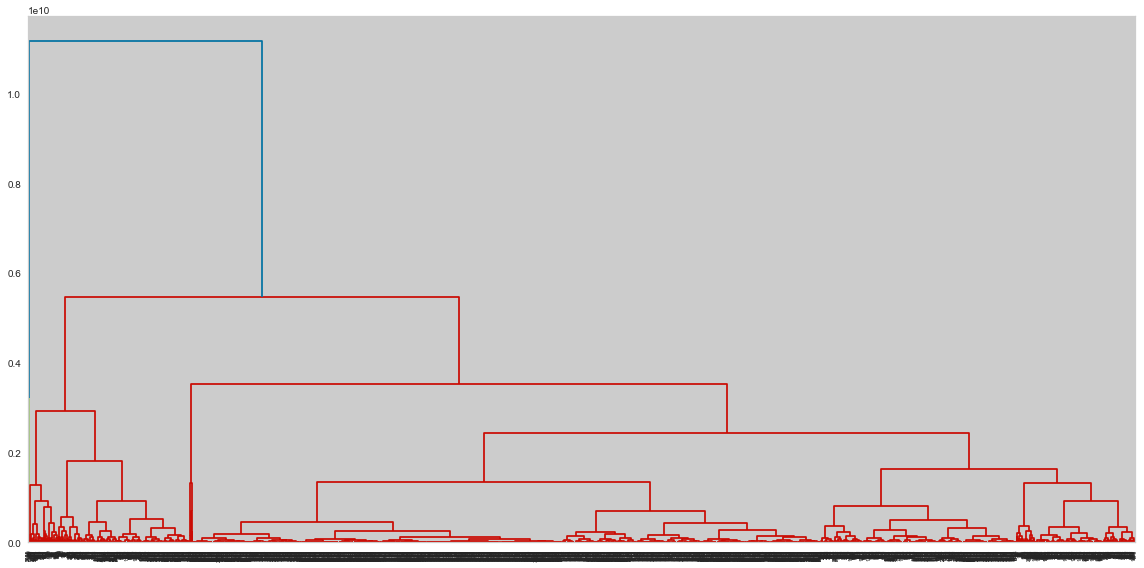

In [119]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

This is the Clsutering matrix top alined

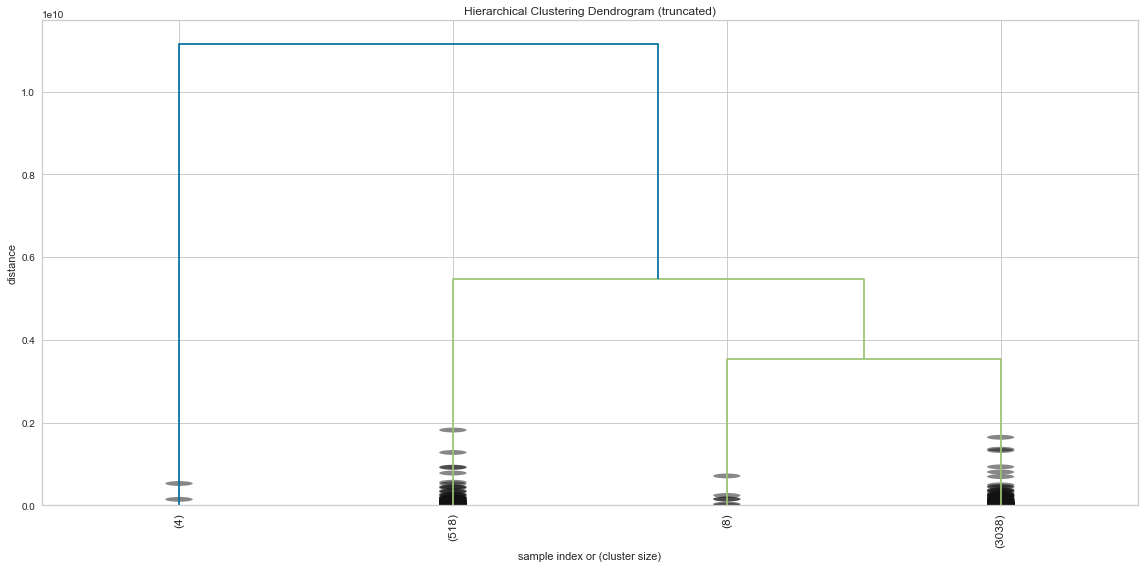

In [120]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

This clustering matrix only has 4 clusters to simplify the matrix.

In [121]:
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

cluster
0        2
1        2
2        2
3        2
4        1

In [122]:
df2 = df.join(df1)
df2.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                   961.75   
1                   302.0     169.0                   563.00   
2                   602.0     148.0                   961.75   
3                   813.0     164.0                 22000.00   
5                   462.0     132.0                   475.00   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
5                   530.0                   640.0   73058679.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                     4834.0                   0.0   
1           471220                    48350.0                   0.0   
2           275868                    11700.0                   1.0   
3          1144337                   106759.0                   0.0   
5           212204                     1873.0                   1.0   

   num_user_for_reviews  ...       profit  content_rating_G  \
0                3054.0  ...  523505847.0                 0   
1                1238.0  ...    9404152.0                 0   
2                 994.0  ...  -44925825.0                 0   
3                2701.0  ...  198130642.0                 0   
5                 738.0  ... -190641321.0                 0   

   content_rating_NC-17  content_rating_PG  content_rating_PG-13  \
0                     0                  0                     1   
1                     0                  0                     1   
2                     0                  0                     1   
3                     0                  0                     1   
5                     0                  0                     1   

   content_rating_R  country_Other  country_UK  country_USA  cluster  
0                 0              0           0            1      2.0  
1                 0              0           0            1      2.0  
2                 0              0           1            0      2.0  
3                 0              0           0            1      2.0  
5                 0              0           0            1      2.0  

[5 rows x 25 columns]

In [123]:
df2.groupby('cluster').size()

cluster
0.0       2
1.0    2466
2.0     469
3.0       7
dtype: int64

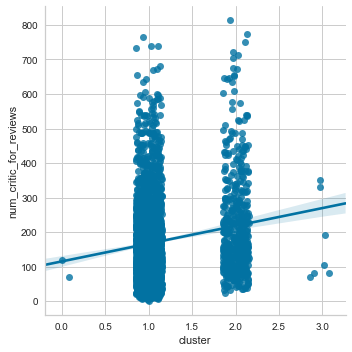

In [124]:
sns.lmplot("cluster", "num_critic_for_reviews", df2, x_jitter=.15, y_jitter=.15)

## 9 Storytelling

- Note: Only the storytelling for sections 6-8 will be included as 1-5 were part of the midterm.

### 9.1 Regression

I created several regression models to help visualize the information. These models and the R Squared are as followed.

- Linear Regerssion model had an adjusted R-squared of .338
- Lasso Model had an r-squared of .339
- f_regression model had an r-squared of.291
- The first adjusted model with 4 of the predictors had a adjusted r-squared of .290
- The first adjusted model with 2 of the predictors had a adjusted r-squared of .231
- The first adjusted model with 1 of the predictors had a adjusted r-squared of .104
- The Random Forest Regressor had a r-squared of .935.

In this section With the linear regrssion model we determine that moveies facebook likes and directirs facebook likes are not significanly related to the IMDB score.

In the Lasso model serveral X variables were remved because there coefficets were 0 and didn't show much significance.

In the F-regression it determined that the number of critis for reviews and neumber of voted users were the two most important predictors.

In the RFE model Duration, and facenumber in poster were the to most importnat variables in determning the IMDB score.

In this section I also found with the random forest regressor wich features were the most important.
- num_voted_users, duration, budget, gross, num_user_for_reviews were the 5 most importnat features found in this model.

##### In the regression analysis portion of the project I determined that the linear regression model is the best model to use and the 5 most importnat features in determining the IMDB score are num_voted_users, duration, budget, gross, num_user_for_reviews.

### 9.2 Classification

Like in the regression section I created several diffrent classification models in an attempt to determine which one would be the most effective. These models and there results include the following:

- Decision Tree: This model was accurate about 64% of the time.
    - Movie facebook likes appeared as a mojor influential factor in this decision tree.
    - After reviewing the decison tree I determined that this version of it was much to complicated to be practicle so i decided to simplify it.
- Decision Tree Simplification: The simplified model was accurate about 72% of the time so much more accurate then the first model.
    - Looking at the Decison tree it is also much simplier and with it being more accurate this model is defenlty better than the first one.
- Logistic Regression: This model predicted what the IMDB bin would be with about 69% accuracy.
- K-nearest Neighbors: This model was accurate arround 60% of the time when predicting the IMDB bin.
- Random Forest Classsifier: This model predicted with arround 73% accuracy what the IMDB bin would be.
- Feature seclection classifiaction analysis: With this one after finding the most important features i created a new model with just those features. This model correctly predicted 66% of the time.
- RFE model: This was the last mdoel that I developed and it had  a 66% prediction accuracy.

In the Feature selection section I also found the most important variables to the classification models.
- I determined that Number of Critics for review, Duration, Gross, Cast total facebook likes, and Title year were the five best predictors for the data set.

Also in the RFE section I found what some of the most important features were. These featurese were:
- num_critic_for_reviews
- duration
- facenumber_in_poster
- num_user_for_reviews
- title_year

##### In conculsion in this section the best classification model that I created was the Random Forrest Classifier model. This model was accutate arround 73% of the time. Also I found that the two most importnat features in this section are Number of Critics for review, and Duration.

### 9.3 Clustering

In this section I performed 2 diffrent clustering analysis.

##### K-means:
- This analyisis I clustered the data into 5 diffrent bins.
- The data only went into 4 though leaving one of the bins unused.
- Cluster 1 has 415 observations Cluster 2 has 2 observations Clsuter 3 has 0 observations Cluster 4 has 2,521 observations Cluster 5 has 6 observations
- Profile of each cluster:
    - Cluster 1: High number of critic reviews, high number of users voted, high Gross, and high number of users for review
    - Cluster 2: Low number of critic reviews, low number of users voted, average Gross, and low number of users for review
    - Cluster 4: Averge number of critic reviews, average number of users voted, average Gross, and average number of users for review
    - Cluster 5: Average number of critic reviews, average number of users voted, low Gross, and average number of users for review
    
##### Hierachical:
- This analysis I clustered the data into 4 bins.
- Cluster 1 has 2 observations Cluster 2 has 2,466 observations Clsuter 3 has 469 observations Cluster 4 has 7 observations
- There is a positive corelation between the binn that a cluster is in and the number of critic reviews that it has.